In [1]:
from IPython.display import display, HTML
display(HTML("""<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{fontsize:12pt;padding:5px;}
table.dataframe{font-size:12px;}))
</style>
"""))

# <span style="color:red">ch01 허깅페이스</span>

- Transformers라이브러리 내 pipeline()함수
- Inference API : key를 사용

In [2]:
import warnings

warnings.filterwarnings(action = 'ignore')

# 1. 텍스트 기반 감정분석(긍정/부정)

In [3]:
from transformers import pipeline

classifier = pipeline(task = "text-classification")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [4]:
classifier("이 영화는 정말 최고였어요. 감동적이고 연기가 대단해요")

[{'label': 'POSITIVE', 'score': 0.8940554261207581}]

In [5]:
result = classifier(["I've been waiting for a HuggingFace course my whole life.",
            "I hate this so much!"])
[r.get('label') for r in result]

['POSITIVE', 'NEGATIVE']

In [6]:
classifier = pipeline(task = "sentiment-analysis",
                     model = "distilbert-base-uncased-finetuned-sst-2-english")
classifier(["I've been waiting for a HuggingFace course my whole life.",
            "I hate this so much!"])

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

# 2. 제로-샷 분류(zero-shot-classification)

- 비지도학습

In [7]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification",
                     "facebook/bart-large-mnli")
classifier("I have a problem with my iphone that needs to be resolved asap!!",
          candidate_labels=["phone", "urgent", "tablet", "computer"])

Device set to use cpu


{'sequence': 'I have a problem with my iphone that needs to be resolved asap!!',
 'labels': ['urgent', 'phone', 'computer', 'tablet'],
 'scores': [0.5049763917922974,
  0.48007503151893616,
  0.012633666396141052,
  0.0023148944601416588]}

In [8]:
# 제시된 문장이 어떤 분류에 속할지 

classifier(
    "This is a course about the transformers library.",
    candidate_labels=["education", "business", "politics"]
)

{'sequence': 'This is a course about the transformers library.',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.9053581357002258, 0.07259627431631088, 0.02204558439552784]}

# 3. text 생성

In [16]:
generator = pipeline(task = "text-generation",
                    model = "gpt2")  # 허깅페이스에는 gpt2까지
generator("In this course. We will teach you how to",
         pad_token_id=generator.tokenizer.eos_token_id)

Device set to use cpu


[{'generated_text': 'In this course. We will teach you how to solve problems that are difficult to solve yourself. This is because the problem is complex, and you will need to solve problems that are easy to solve.\n\nYour goal is to have a good understanding of the problem that you are trying to solve.\n\nHow to solve the problem\n\nThe goal of this course is to solve the problem.\n\nThe problem is very difficult to solve. The problem is even harder to solve.\n\nThe problem is even harder to solve. The problem is even harder to solve.\n\nThe problem is even harder to solve. The problem is even harder to solve.\n\nThe problem is even harder to solve. The problem is even harder to solve.\n\nThe problem is even harder to solve. The problem is even harder to solve.\n\nThe problem is even harder to solve. The problem is even harder to solve.\n\nThe problem is even harder to solve. The problem is even harder to solve.\n\nThe problem is even harder to solve. The problem is even harder to sol

In [17]:
generator("이 과정은 다음과 같은 방법을 알려드려요. ",
         pad_token_id=generator.tokenizer.eos_token_id)

[{'generated_text': '이 과정은 다음과 같은 방법을 알려드려요. 한 문말하는 수을 현반리 과 정과 같은 다음과 같은 아루은 만로요. 한 합다. 문말하는 수을 현반리 과 정과 같은 다음과 같은 아루은 만로요. 한 합다. 문말하는 수을 현반리 과 정과 같은 다음과 같은 아루은 만로요. 한 친에어�'}]

# 4. 마스크 채우기

In [13]:
unmasker = pipeline("fill-mask", "distilroberta-base")
unmasker("I'm going to hospital and meet a <mask>")

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'score': 0.19275875389575958,
  'token': 3299,
  'token_str': ' doctor',
  'sequence': "I'm going to hospital and meet a doctor"},
 {'score': 0.06794668734073639,
  'token': 27321,
  'token_str': ' psychiatrist',
  'sequence': "I'm going to hospital and meet a psychiatrist"},
 {'score': 0.06435622274875641,
  'token': 16308,
  'token_str': ' surgeon',
  'sequence': "I'm going to hospital and meet a surgeon"},
 {'score': 0.05912911519408226,
  'token': 9008,
  'token_str': ' nurse',
  'sequence': "I'm going to hospital and meet a nurse"},
 {'score': 0.05705659091472626,
  'token': 1441,
  'token_str': ' friend',
  'sequence': "I'm going to hospital and meet a friend"}]

In [14]:
unmasker("Hello, I'm a <mask> model",
        top_k = 2)  # top_k를 안 주면 5개

[{'score': 0.0361194983124733,
  'token': 265,
  'token_str': ' business',
  'sequence': "Hello, I'm a business model"},
 {'score': 0.02683814987540245,
  'token': 18150,
  'token_str': ' freelance',
  'sequence': "Hello, I'm a freelance model"}]

In [22]:
# google-bert/bert-base-uncased사용을 위해 key 발부

from transformers import pipeline

unmasker = pipeline(task = "fill-mask",
                   model = "google-bert/bert-base-uncased")
unmasker("Hello, I'm a [MASK] model", top_k = 2)

Some weights of the model checkpoint at google-bert/bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'score': 0.06705890595912933,
  'token': 4827,
  'token_str': 'fashion',
  'sequence': "hello, i ' m a fashion model"},
 {'score': 0.058972738683223724,
  'token': 2047,
  'token_str': 'new',
  'sequence': "hello, i ' m a new model"}]

In [18]:
import os
from dotenv import load_dotenv

load_dotenv()
# print(os.environ['HF_TOKEN'])

True

In [19]:
from huggingface_hub import InferenceClient

client = InferenceClient(provider = "hf-inference",
                        api_key = os.environ['HF_TOKEN'])
result = client.fill_mask(
    "Hello, I'm a [MASK] model",
    model = "google-bert/bert-base-uncased",
    top_k = 2
)

In [20]:
[r.sequence for r in result]

["hello, i ' m a fashion model", "hello, i ' m a new model"]

In [23]:
from transformers import pipeline

unmasker = pipeline(task = "fill-mask",
                   model = "bert-base-multilingual-cased")

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [24]:
unmasker("안녕하세요? 나는 [MASK] 모델입니다", top_k = 3)

[{'score': 0.14155958592891693,
  'token': 62592,
  'token_str': '여자',
  'sequence': '안녕하세요? 나는 여자 모델입니다'},
 {'score': 0.13301970064640045,
  'token': 108399,
  'token_str': '가수',
  'sequence': '안녕하세요? 나는 가수 모델입니다'},
 {'score': 0.08411936461925507,
  'token': 102574,
  'token_str': '프로',
  'sequence': '안녕하세요? 나는 프로 모델입니다'}]

# 5. 개체명 인식(NER : Named Entity REcognition)

In [40]:
ner = pipeline(task = "ner")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [41]:
ner("My name is Tom and I work at Facebook in Brooklyn")

[{'entity': 'I-PER',
  'score': 0.9987527,
  'index': 4,
  'word': 'Tom',
  'start': 11,
  'end': 14},
 {'entity': 'I-ORG',
  'score': 0.9977857,
  'index': 9,
  'word': 'Facebook',
  'start': 29,
  'end': 37},
 {'entity': 'I-LOC',
  'score': 0.9946062,
  'index': 11,
  'word': 'Brooklyn',
  'start': 41,
  'end': 49}]

# 6. 질의 응답

In [26]:
from transformers import pipeline

question_answer = pipeline("question-answering",
                          "distilbert-base-cased-distilled-squad")

Device set to use cpu


In [27]:
question_answer(
    question = "Where do I work?",
    context = "My name is Tom and I work at Facebook in Brooklyn"
)

{'score': 0.5976610779762268, 'start': 29, 'end': 37, 'answer': 'Facebook'}

In [29]:
context = "My name is Tom and I work at Facebook in Brooklyn"
context[29:37]

'Facebook'

# 7. 문서요약

- 현재 torch 2.6이상 추천

In [30]:
import torch

torch.__version__

'2.5.1'

In [31]:
summarizer = pipeline(task = "summarization",
                     model = "facebook/bart-large-cnn")

Device set to use cpu


In [32]:
summarizer("""It is a momentous occasion for fans of the K-pop group BTS. The seven singers of the popular K-pop band plan to reunite as a group sometime in 2025 now that they’ve finished their service.
Last week, BTS superstars RM and V were discharged from South Korea’s military after fulfilling their mandatory service. Jimin and Jung Kook were discharged a day later. All four were enlisted in December 2023.
K-pop supergroup BTS could soon make a comeback with six out of its seven members discharged from South Korea’s military
Six of the group’s seven members served in the army, while Suga fulfilled his duty as a social service agent, an alternative form of military service.
Jin, the oldest BTS member, was discharged in June 2024. J-Hope was discharged in October.
""",
   max_length = 150,
   min_length = 30,
   do_sample = False  # True면 무작위 단어로 창의적으로 요약
)

[{'summary_text': 'Six of the group’s seven members served in the army. Suga fulfilled his duty as a social service agent, an alternative form of military service. Jimin and Jung Kook were discharged a day later.'}]

# 8. 번역

In [33]:
# 한 → 영
ko2en = pipeline("translation", 
                model = "Helsinki-NLP/opus-mt-ko-en")

# 영 → 한(?)
en2ko = pipeline("translation",
                model = "Helsinki-NLP/opus-mt-tc-big-en-ko")

All model checkpoint layers were used when initializing TFMarianMTModel.

All the layers of TFMarianMTModel were initialized from the model checkpoint at Helsinki-NLP/opus-mt-ko-en.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMarianMTModel for predictions without further training.
Device set to use 0
Device set to use cpu


In [34]:
# 테스트 문장

ko_sentence = "이 문장을 영어로 번역해 주세요."
en_sentence = "I enjoy learning about AI."
ko_result = ko2en(ko_sentence)[0]['translation_text']
en_result = en2ko(en_sentence)[0]['translation_text']
print("한 → 영 :", ko_result)
print("영 → 한 :", en_result)

한 → 영 : Please translate this sentence into English.
영 → 한 : US  팽창식 줄.


In [35]:
result = ko2en([
    "이 문장을 영어로 번역해 주세요.",
    "내일은 드디어 LLM 시작!",
    "머신러닝과 딥러닝 평가가 있어요"
])

In [36]:
print('\n'.join([r['translation_text'] for r in result]))

Please translate this sentence into English.
Tomorrow, we're finally starting the LLM!
I've got machine-driving and deep-running evaluations.


# 9. 이미지를 설명하는 텍스트 생성

In [37]:
imagetotext = pipeline(task = "image-to-text",
                      model = "ydshieh/vit-gpt2-coco-en")

All model checkpoint layers were used when initializing TFVisionEncoderDecoderModel.

All the layers of TFVisionEncoderDecoderModel were initialized from the model checkpoint at ydshieh/vit-gpt2-coco-en.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFVisionEncoderDecoderModel for predictions without further training.
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use 0


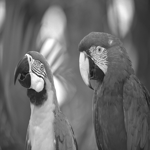

In [38]:
url = 'https://huggingface.co/datasets/Narsil/image_dummy/resolve/main/parrots.png'

from PIL import Image
import requests

image = Image.open(requests.get(url, stream = True).raw)
small_image = image.resize((150, 150))
small_image

In [39]:
imagetotext(url, max_new_tokens = 30)

[{'generated_text': 'two birds are standing next to each other '}]

In [42]:
type(small_image), type(image)

(PIL.Image.Image, PIL.PngImagePlugin.PngImageFile)

In [43]:
imagetotext(image, max_new_tokens = 50)

[{'generated_text': 'two birds are standing next to each other '}]

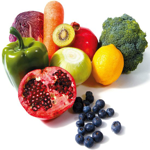

In [44]:
# 내 PC의 이미지 설명

image = Image.open('images/fb.jpg')
image.resize((150, 150))

In [45]:
imagetotext('images/fb.jpg', max_new_tokens = 300)

[{'generated_text': 'a variety of fruits and vegetables are displayed on a table '}]

In [46]:
imagetotext(image, max_new_tokens = 30)

[{'generated_text': 'a variety of fruits and vegetables are displayed on a table '}]

# 10. 이미지분류

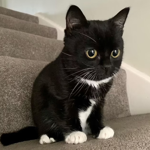

In [47]:
image = Image.open('images/cat.jpg')
image.resize((150, 150))

In [48]:
# model명을 기입하지 않으면 task에 따라 기본 모델 자동 셋팅

imgclassifier = pipeline(task = "image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


In [49]:
imgclassifier(image)

[{'label': 'Egyptian cat', 'score': 0.853131890296936},
 {'label': 'tabby, tabby cat', 'score': 0.04750382527709007},
 {'label': 'tiger cat', 'score': 0.03486616536974907},
 {'label': 'Persian cat', 'score': 0.007555846590548754},
 {'label': 'Siamese cat, Siamese', 'score': 0.003788590431213379}]